In [8]:
sc.master

u'local[*]'

In [9]:
global Path    
if sc.master[0:5]=="local" :
   Path="file:/home/hduser/pythonwork/PythonProject/"
else:   
   Path="hdfs://master:9000/user/hduser/"

In [10]:
rawUserData = sc.textFile(Path+"log.txt")
rawUserData.count()

30

In [11]:
rawUserData.take(10)

[u'[2014/08/17 00:00:00] - This is test logC.',
 u'[2014/08/17 01:15:00] - This is test logA.',
 u'[2014/08/17 04:50:20] - This is test logB.',
 u'[2014/08/17 08:07:10] - This is test logA.',
 u'[2014/08/17 11:42:16] - This is test logB.',
 u'[2014/08/17 15:10:18] - This is test logB.',
 u'[2014/08/17 17:18:00] - This is test logA.',
 u'[2014/08/17 20:00:50] - This is test logA.',
 u'[2014/08/17 22:01:10] - This is test logB.',
 u'[2014/08/18 00:10:05] - This is test logC.']

In [12]:
userRDD1=rawUserData.map(lambda line: line.split(" "))
userRDD1.take(5)

[[u'[2014/08/17', u'00:00:00]', u'-', u'This', u'is', u'test', u'logC.'],
 [u'[2014/08/17', u'01:15:00]', u'-', u'This', u'is', u'test', u'logA.'],
 [u'[2014/08/17', u'04:50:20]', u'-', u'This', u'is', u'test', u'logB.'],
 [u'[2014/08/17', u'08:07:10]', u'-', u'This', u'is', u'test', u'logA.'],
 [u'[2014/08/17', u'11:42:16]', u'-', u'This', u'is', u'test', u'logB.']]

In [13]:
sqlContext = SparkSession.builder.getOrCreate()
from pyspark.sql import Row
user_Rows1 = userRDD1.map(lambda p:
     Row(
         date=p[0], 
         time=p[1],
         log=p[6]
            )
)
user_Rows1.take(5)

[Row(date=u'[2014/08/17', log=u'logC.', time=u'00:00:00]'),
 Row(date=u'[2014/08/17', log=u'logA.', time=u'01:15:00]'),
 Row(date=u'[2014/08/17', log=u'logB.', time=u'04:50:20]'),
 Row(date=u'[2014/08/17', log=u'logA.', time=u'08:07:10]'),
 Row(date=u'[2014/08/17', log=u'logB.', time=u'11:42:16]')]

In [14]:
user_df1= sqlContext.createDataFrame(user_Rows1)
user_df1 .printSchema()

root
 |-- date: string (nullable = true)
 |-- log: string (nullable = true)
 |-- time: string (nullable = true)



In [25]:
user_df1.show()

+-----------+-----+---------+
|       date|  log|     time|
+-----------+-----+---------+
|[2014/08/17|logC.|00:00:00]|
|[2014/08/17|logA.|01:15:00]|
|[2014/08/17|logB.|04:50:20]|
|[2014/08/17|logA.|08:07:10]|
|[2014/08/17|logB.|11:42:16]|
|[2014/08/17|logB.|15:10:18]|
|[2014/08/17|logA.|17:18:00]|
|[2014/08/17|logA.|20:00:50]|
|[2014/08/17|logB.|22:01:10]|
|[2014/08/18|logC.|00:10:05]|
|[2014/08/18|logC.|02:20:10]|
|[2014/08/18|logB.|04:30:15]|
|[2014/08/18|logB.|10:40:20]|
|[2014/08/18|logB.|18:50:22]|
|[2014/08/19|logA.|03:33:00]|
|[2014/08/19|logB.|07:17:15]|
|[2014/08/19|logA.|09:20:05]|
|[2014/08/19|logC.|09:30:03]|
|[2014/08/19|logA.|12:00:17]|
|[2014/08/19|logB.|13:00:47]|
+-----------+-----+---------+
only showing top 20 rows



In [24]:
jdf=user_df1.select("date","log").groupby("date","log").count()
jdf.show()

+-----------+-----+-----+
|       date|  log|count|
+-----------+-----+-----+
|[2014/08/18|logC.|    2|
|[2014/08/17|logA.|    4|
|[2014/08/19|logC.|    3|
|[2014/08/19|logA.|    6|
|[2014/08/17|logB.|    4|
|[2014/08/18|logB.|    3|
|[2014/08/17|logC.|    1|
|[2014/08/19|logB.|    3|
|[2014/08/20|logA.|    3|
|[2014/08/20|logC.|    1|
+-----------+-----+-----+



In [50]:
jdf2=jdf.filter("date='[2014/08/19' or date='[2014/08/20' ")
jdf2.show()

+-----------+-----+-----+
|       date|  log|count|
+-----------+-----+-----+
|[2014/08/19|logC.|    3|
|[2014/08/19|logA.|    6|
|[2014/08/19|logB.|    3|
|[2014/08/20|logA.|    3|
|[2014/08/20|logC.|    1|
+-----------+-----+-----+



In [51]:
jdf3=jdf2.filter(" log='logA.' ")
jdf3.show()

+-----------+-----+-----+
|       date|  log|count|
+-----------+-----+-----+
|[2014/08/19|logA.|    6|
|[2014/08/20|logA.|    3|
+-----------+-----+-----+



In [52]:
import pandas as pd
GroupBydate_pandas_df =jdf3.toPandas().set_index('date')
GroupBydate_pandas_df 

,log,count
date,,
[2014/08/19,logA.,6
[2014/08/20,logA.,3


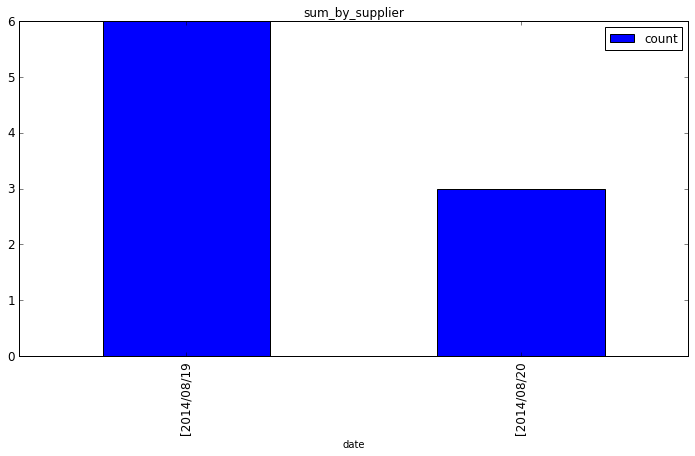

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = GroupBydate_pandas_df ['count']  \
            .plot(kind='bar', title ="sum_by_supplier",figsize=(12,6),legend=True, fontsize=12)
plt.show()

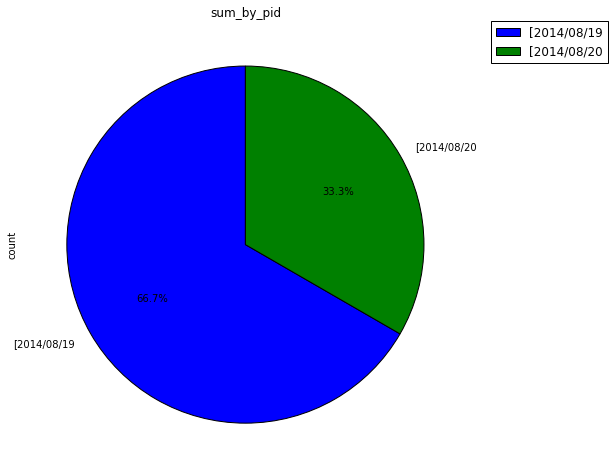

In [54]:
%matplotlib inline
# ax = GroupBypid_pandas_df ['sum(amount)']  \
#             .plot(kind='pie', title ="sum_by_pname",figsize=(12,6),legend=True, fontsize=12)
# plt.show()

ax =GroupBydate_pandas_df ['count'].plot(kind='pie',
           title ="sum_by_pid",figsize=(8,8),startangle=90,autopct='%1.1f%%')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()